# Guided Project: Predicting board game reviews

Data Scientist / Machine Learning / Machine Learning in Python: Beginner / Guided Project: Predicting board game reviews

Board games have been making a comeback lately, and deeper, more strategic boardgames, like [Settlers of Catan](https://en.wikipedia.org/wiki/Catan) have become hugely popular. A popular site where these types of board games are discussed and reviewed is [BoardGameGeek](http://www.boardgamegeek.com/).

In this project, you'll be working with a data set that contains 80000 board games and their associated review scores. The data was scraped from BoardGameGeek and compiled into CSV format by Sean Beck. The data set is stored in board_games.csv, and can be downloaded [here](https://github.com/ThaWeatherman/scrapers/blob/master/boardgamegeek/games.csv). If you need help at any point, you can consult our solution notebook [here](https://github.com/dataquestio/solutions/blob/master/Mission211Solution.ipynb) .

Each row represents a single board game, and has descriptive statistics about the board game, as well as review information. Here are some of the interesting columns:

- __name__: name of the board game.
- __playingtime__: the playing time (given by the manufacturer).
- __minplaytime__: the minimum playing time (given by the manufacturer).
- __maxplaytime__: the maximum playing time (given by the manufacturer).
- __minage__: the minimum recommended age to play.
- __users_rated__: the number of users who rated the game.
- __average_rating__: the average rating given to the game by users. (0-10)
- __total_weights__: Number of weights given by users. Read more about what BoardGameGeek considers weights [here](https://boardgamegeek.com/wiki/page/Weight).
- __average_weight__: the average of all the subjective weights (0-5).
One interesting machine learning task might be to predict average_rating using the other columns. The data set contains quite a few missing values, and rows where there are no reviews. You'll need to remove these as you explore the data to make prediction easier.

In [5]:
import pandas as pd

board_games = pd.read_csv("F:\\YandexDisk\\ML\\Dataquest\\games.csv")
board_games = board_games.dropna(axis=0)
board_games.head()

id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0        14383         8.28798               8.14232   
2        210.0    12.0         9262         8.28994               8.06886   
3        240.0    12.0        13294         8.20407               8.05804   
4        150.0    12.0        39883         8.14261               8.04524   

   total_owners  total_traders  total_wanters  total_wishers  total_comments  \
0         26647            372           1219           5865            5347   
1         16519            132           1586           6277            2526   
2         12230             99           1476           5600            1700   
3         14343            362           1084           5075            3378   
4         44362            795            861           5414            9173   

   total_weights  average_weight  
0           2562          3.4785  
1           1423          3.8939  
2            777          3.7761  
3           1642          4.1590  
4           5213          3.2943

In [7]:
board_games.shape

(81268, 20)

In [8]:
board_games = board_games[board_games["average_rating"] > 0]

In [9]:
board_games.shape

(56894, 20)

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

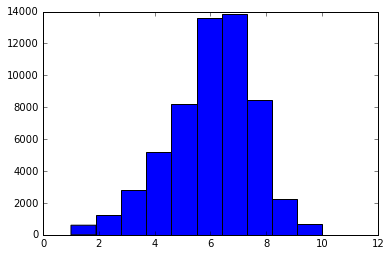

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(board_games["average_rating"])

In [11]:
print(board_games["average_rating"].std())
print(board_games["average_rating"].mean())

1.5788299348332662
6.016112849333889


## Error metric
In this data set, using mean squared error as an error metric makes sense. This is because the data is continuous, and follows a somewhat normal distribution. We'll be able to compare our error to the standard deviation to see how good the model is at predictions.

In [13]:
from sklearn.cluster import KMeans

clus = KMeans(n_clusters=5)
cols = list(board_games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
numeric = board_games[cols]

clus.fit(numeric)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
import numpy
game_mean = numeric.apply(numpy.mean, axis=1)
game_std = numeric.apply(numpy.std, axis=1)

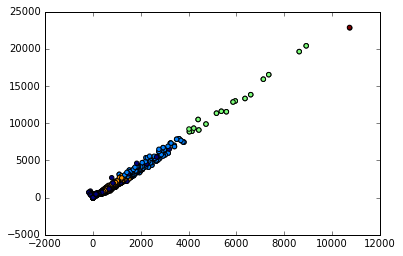

In [20]:
labels = clus.labels_

plt.scatter(x=game_mean, y=game_std, c=labels)

## Game clusters
It looks like most of the games are similar, but as the game attributes tend to increase in value (such as number of users who rated), there are fewer high quality games. So most games don't get played much, but a few get a lot of players.

In [22]:
correlations = numeric.corr()

correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

## Correlations
The yearpublished column is surprisingly highly correlated with average_rating, showing that more recent games tend to be rated more highly. Games for older players (minage is high) tend to be more highly rated. The more "weighty" a game is (average_weight is high), the more highly it tends to be rated.

In [23]:
cols.remove("average_rating")
cols.remove("bayes_average_rating")
cols.remove("minplayers")
cols.remove("maxplayers")
cols.remove("playingtime")
cols.remove("minplaytime")
cols.remove("maxplaytime")

In [24]:
numeric = numeric[cols]

In [26]:
numeric.head()

yearpublished  minage  users_rated  total_owners  total_traders  \
0         2005.0    13.0        20113         26647            372   
1         2012.0    12.0        14383         16519            132   
2         2013.0    12.0         9262         12230             99   
3         2006.0    12.0        13294         14343            362   
4         2002.0    12.0        39883         44362            795   

   total_wanters  total_wishers  total_comments  total_weights  average_weight  
0           1219           5865            5347           2562          3.4785  
1           1586           6277            2526           1423          3.8939  
2           1476           5600            1700            777          3.7761  
3           1084           5075            3378           1642          4.1590  
4            861           5414            9173           5213          3.2943

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(board_games[cols], board_games["average_rating"])
predictions = reg.predict(board_games[cols])

numpy.mean((predictions - board_games["average_rating"]) ** 2)

2.097056133604944

## Game clusters
The error rate is close to the standard deviation of all board game ratings. This indicates that our model may not have high predictive power. We'll need to dig more into which games were scored well, and which ones weren't.